Load Credit Card Database (SQL)

1.1 Data Extraction and Transformation with Python and PySpark

For “Credit Card System,” create a Python and PySpark SQL program to read/extract the following JSON files according to the specifications found in the mapping document

1. CDW_SAPP_BRANCH.JSON
2. CDW_SAPP_CREDITCARD.JSON
3. CDW_SAPP_CUSTOMER.JSON

In [186]:
from pyspark.sql.types import IntegerType, StringType, TimestampType, DoubleType, StructType, StructField
from pyspark.sql.functions import concat, lit, col, initcap, lower, month, length, lpad
import mysql.connector as mydbconnection 
import requests
import random
import pandas as pd
from matplotlib import pyplot as plt
from pyspark.sql import SparkSession, Row
import mysqlSecrets

In [187]:

spark = SparkSession.builder.appName('Capstone_demo').getOrCreate()

#Read json file which holds branch information into dataframe
df_branch = spark.read.json("cdw_sapp_branch.json")
df_branch.show()

+-----------------+-----------+------------+------------+------------+-------------------+----------+--------------------+
|      BRANCH_CITY|BRANCH_CODE| BRANCH_NAME|BRANCH_PHONE|BRANCH_STATE|      BRANCH_STREET|BRANCH_ZIP|        LAST_UPDATED|
+-----------------+-----------+------------+------------+------------+-------------------+----------+--------------------+
|        Lakeville|          1|Example Bank|  1234565276|          MN|       Bridle Court|     55044|2018-04-18T16:51:...|
|          Huntley|          2|Example Bank|  1234618993|          IL|  Washington Street|     60142|2018-04-18T16:51:...|
|SouthRichmondHill|          3|Example Bank|  1234985926|          NY|      Warren Street|     11419|2018-04-18T16:51:...|
|       Middleburg|          4|Example Bank|  1234663064|          FL|   Cleveland Street|     32068|2018-04-18T16:51:...|
|    KingOfPrussia|          5|Example Bank|  1234849701|          PA|        14th Street|     19406|2018-04-18T16:51:...|
|         Paters

In [188]:
#Read json file which holds credit card information into dataframe
df_creditCard = spark.read.load("cdw_sapp_credit.json", format="json", header = True,inferSchema = True)
df_creditCard.show(5)

+-----------+----------------+---------+---+-----+--------------+----------------+-----------------+----+
|BRANCH_CODE|  CREDIT_CARD_NO| CUST_SSN|DAY|MONTH|TRANSACTION_ID|TRANSACTION_TYPE|TRANSACTION_VALUE|YEAR|
+-----------+----------------+---------+---+-----+--------------+----------------+-----------------+----+
|        114|4210653349028689|123459988| 14|    2|             1|       Education|             78.9|2018|
|         35|4210653349028689|123459988| 20|    3|             2|   Entertainment|            14.24|2018|
|        160|4210653349028689|123459988|  8|    7|             3|         Grocery|             56.7|2018|
|        114|4210653349028689|123459988| 19|    4|             4|   Entertainment|            59.73|2018|
|         93|4210653349028689|123459988| 10|   10|             5|             Gas|             3.59|2018|
+-----------+----------------+---------+---+-----+--------------+----------------+-----------------+----+
only showing top 5 rows



In [189]:
#Read json file which holds customer information into dataframe
df_customer = spark.read.load("cdw_sapp_custmer.json", format="json", header = True,inferSchema = True)
df_customer.show(5)

+------+----------------+------------+-------------+-------------------+----------+----------+--------+----------+---------+--------------------+-----------+---------+-----------------+
|APT_NO|  CREDIT_CARD_NO|   CUST_CITY| CUST_COUNTRY|         CUST_EMAIL|CUST_PHONE|CUST_STATE|CUST_ZIP|FIRST_NAME|LAST_NAME|        LAST_UPDATED|MIDDLE_NAME|      SSN|      STREET_NAME|
+------+----------------+------------+-------------+-------------------+----------+----------+--------+----------+---------+--------------------+-----------+---------+-----------------+
|   656|4210653310061055|     Natchez|United States|AHooper@example.com|   1237818|        MS|   39120|      Alec|   Hooper|2018-04-21T12:49:...|         Wm|123456100|Main Street North|
|   829|4210653310102868|Wethersfield|United States|EHolman@example.com|   1238933|        CT|   06109|      Etta|   Holman|2018-04-21T12:49:...|    Brendan|123453023|    Redwood Drive|
|   683|4210653310116272|     Huntley|United States|WDunham@example.co

Extract all the JSON files based on the mapping 

In [190]:
df_branch_new = df_branch.select("BRANCH_CODE", "BRANCH_NAME", "BRANCH_STREET", "BRANCH_CITY", "BRANCH_STATE", "BRANCH_ZIP", "BRANCH_PHONE", "LAST_UPDATED")
# display the schema in tree format
df_branch_new.printSchema()
#show the first five rows
df_branch_new.show(5)


root
 |-- BRANCH_CODE: long (nullable = true)
 |-- BRANCH_NAME: string (nullable = true)
 |-- BRANCH_STREET: string (nullable = true)
 |-- BRANCH_CITY: string (nullable = true)
 |-- BRANCH_STATE: string (nullable = true)
 |-- BRANCH_ZIP: long (nullable = true)
 |-- BRANCH_PHONE: string (nullable = true)
 |-- LAST_UPDATED: string (nullable = true)

+-----------+------------+-----------------+-----------------+------------+----------+------------+--------------------+
|BRANCH_CODE| BRANCH_NAME|    BRANCH_STREET|      BRANCH_CITY|BRANCH_STATE|BRANCH_ZIP|BRANCH_PHONE|        LAST_UPDATED|
+-----------+------------+-----------------+-----------------+------------+----------+------------+--------------------+
|          1|Example Bank|     Bridle Court|        Lakeville|          MN|     55044|  1234565276|2018-04-18T16:51:...|
|          2|Example Bank|Washington Street|          Huntley|          IL|     60142|  1234618993|2018-04-18T16:51:...|
|          3|Example Bank|    Warren Street|S

In [191]:
df_creditCard_new = df_creditCard.select("CREDIT_CARD_NO","DAY", "MONTH", "YEAR", "CUST_SSN", "BRANCH_CODE", "TRANSACTION_TYPE", "TRANSACTION_VALUE", "TRANSACTION_ID")
# display the schema in tree format
df_creditCard_new.printSchema()
#show the first five rows
df_creditCard_new.show(5)


root
 |-- CREDIT_CARD_NO: string (nullable = true)
 |-- DAY: long (nullable = true)
 |-- MONTH: long (nullable = true)
 |-- YEAR: long (nullable = true)
 |-- CUST_SSN: long (nullable = true)
 |-- BRANCH_CODE: long (nullable = true)
 |-- TRANSACTION_TYPE: string (nullable = true)
 |-- TRANSACTION_VALUE: double (nullable = true)
 |-- TRANSACTION_ID: long (nullable = true)

+----------------+---+-----+----+---------+-----------+----------------+-----------------+--------------+
|  CREDIT_CARD_NO|DAY|MONTH|YEAR| CUST_SSN|BRANCH_CODE|TRANSACTION_TYPE|TRANSACTION_VALUE|TRANSACTION_ID|
+----------------+---+-----+----+---------+-----------+----------------+-----------------+--------------+
|4210653349028689| 14|    2|2018|123459988|        114|       Education|             78.9|             1|
|4210653349028689| 20|    3|2018|123459988|         35|   Entertainment|            14.24|             2|
|4210653349028689|  8|    7|2018|123459988|        160|         Grocery|             56.7|      

In [192]:
df_customer_new=df_customer.select("SSN", "FIRST_NAME", "MIDDLE_NAME", "LAST_NAME", "CREDIT_CARD_NO", "STREET_NAME", "APT_NO", "CUST_CITY",
"CUST_STATE", "CUST_COUNTRY", "CUST_ZIP", "CUST_PHONE", "CUST_EMAIL", "LAST_UPDATED")
# display the schema in tree format
df_customer_new.printSchema()
#show the first five rows
df_customer_new.show(5)

root
 |-- SSN: long (nullable = true)
 |-- FIRST_NAME: string (nullable = true)
 |-- MIDDLE_NAME: string (nullable = true)
 |-- LAST_NAME: string (nullable = true)
 |-- CREDIT_CARD_NO: string (nullable = true)
 |-- STREET_NAME: string (nullable = true)
 |-- APT_NO: string (nullable = true)
 |-- CUST_CITY: string (nullable = true)
 |-- CUST_STATE: string (nullable = true)
 |-- CUST_COUNTRY: string (nullable = true)
 |-- CUST_ZIP: string (nullable = true)
 |-- CUST_PHONE: long (nullable = true)
 |-- CUST_EMAIL: string (nullable = true)
 |-- LAST_UPDATED: string (nullable = true)

+---------+----------+-----------+---------+----------------+-----------------+------+------------+----------+-------------+--------+----------+-------------------+--------------------+
|      SSN|FIRST_NAME|MIDDLE_NAME|LAST_NAME|  CREDIT_CARD_NO|      STREET_NAME|APT_NO|   CUST_CITY|CUST_STATE| CUST_COUNTRY|CUST_ZIP|CUST_PHONE|         CUST_EMAIL|        LAST_UPDATED|
+---------+----------+-----------+---------

 change the data type of the branch to the following based on the mapping
 [('BRANCH_CODE', 'int'),
  ('BRANCH_NAME', 'varchar'),
  ('BRANCH_STREET', 'varchar'),
  ('BRANCH_CITY', 'varchar'),
  ('BRANCH_STATE', 'varchar'),
  ('BRANCH_ZIP', 'int'),
  ('BRANCH_PHONE', 'varchar'),
  ('LAST_UPDATED', 'TIMESTAMP')]

In [193]:
df_branch_new = df_branch_new\
.withColumn('BRANCH_CODE', df_branch_new.BRANCH_CODE.cast(IntegerType()))\
.withColumn('BRANCH_NAME', df_branch_new.BRANCH_NAME.cast(StringType()))\
.withColumn('BRANCH_STREET', df_branch_new.BRANCH_STREET.cast(StringType()))\
.withColumn('BRANCH_CITY', df_branch_new.BRANCH_CITY.cast(StringType()))\
.withColumn('BRANCH_STATE', df_branch_new.BRANCH_STATE.cast(StringType()))\
.withColumn('BRANCH_ZIP', df_branch_new.BRANCH_ZIP.cast(IntegerType()))\
.withColumn('BRANCH_PHONE', df_branch_new.BRANCH_PHONE.cast(StringType()))\
.withColumn('LAST_UPDATED', df_branch_new.LAST_UPDATED.cast(TimestampType()))
df_branch_new.dtypes 

[('BRANCH_CODE', 'int'),
 ('BRANCH_NAME', 'string'),
 ('BRANCH_STREET', 'string'),
 ('BRANCH_CITY', 'string'),
 ('BRANCH_STATE', 'string'),
 ('BRANCH_ZIP', 'int'),
 ('BRANCH_PHONE', 'string'),
 ('LAST_UPDATED', 'timestamp')]

If the source value is null load default (99999) value else Direct move


In [194]:
df_branch_new.na.fill(value=99999,subset=["BRANCH_ZIP"]).show(5)

+-----------+------------+-----------------+-----------------+------------+----------+------------+-------------------+
|BRANCH_CODE| BRANCH_NAME|    BRANCH_STREET|      BRANCH_CITY|BRANCH_STATE|BRANCH_ZIP|BRANCH_PHONE|       LAST_UPDATED|
+-----------+------------+-----------------+-----------------+------------+----------+------------+-------------------+
|          1|Example Bank|     Bridle Court|        Lakeville|          MN|     55044|  1234565276|2018-04-18 15:51:47|
|          2|Example Bank|Washington Street|          Huntley|          IL|     60142|  1234618993|2018-04-18 15:51:47|
|          3|Example Bank|    Warren Street|SouthRichmondHill|          NY|     11419|  1234985926|2018-04-18 15:51:47|
|          4|Example Bank| Cleveland Street|       Middleburg|          FL|     32068|  1234663064|2018-04-18 15:51:47|
|          5|Example Bank|      14th Street|    KingOfPrussia|          PA|     19406|  1234849701|2018-04-18 15:51:47|
+-----------+------------+--------------

In [195]:
df_branch_new.select("BRANCH_ZIP").where(length(col("BRANCH_ZIP")) < 5).show(5)

+----------+
|BRANCH_ZIP|
+----------+
|      7501|
|      6109|
|      8844|
|      2155|
|      7866|
+----------+
only showing top 5 rows



Change the format of phone number to (XXX)XXX-XXXX


In [196]:

df_branch_new =df_branch_new.withColumn("BRANCH_PHONE", concat(lit("("),col("BRANCH_PHONE").substr(1, 3), lit(")"),\
                                                        col("BRANCH_PHONE").substr(4, 3), lit("-"), \
                                                        col("BRANCH_PHONE").substr(7, 4)))

df_branch_new = df_branch_new.withColumn('BRANCH_ZIP', lpad(df_branch_new.BRANCH_ZIP,5, '0'))



df_branch_new.show(5)

+-----------+------------+-----------------+-----------------+------------+----------+-------------+-------------------+
|BRANCH_CODE| BRANCH_NAME|    BRANCH_STREET|      BRANCH_CITY|BRANCH_STATE|BRANCH_ZIP| BRANCH_PHONE|       LAST_UPDATED|
+-----------+------------+-----------------+-----------------+------------+----------+-------------+-------------------+
|          1|Example Bank|     Bridle Court|        Lakeville|          MN|     55044|(123)456-5276|2018-04-18 15:51:47|
|          2|Example Bank|Washington Street|          Huntley|          IL|     60142|(123)461-8993|2018-04-18 15:51:47|
|          3|Example Bank|    Warren Street|SouthRichmondHill|          NY|     11419|(123)498-5926|2018-04-18 15:51:47|
|          4|Example Bank| Cleveland Street|       Middleburg|          FL|     32068|(123)466-3064|2018-04-18 15:51:47|
|          5|Example Bank|      14th Street|    KingOfPrussia|          PA|     19406|(123)484-9701|2018-04-18 15:51:47|
+-----------+------------+------

In [197]:
df_branch_new.select("BRANCH_ZIP").where(length(col("BRANCH_ZIP")) < 5).show()

+----------+
|BRANCH_ZIP|
+----------+
+----------+



change the data type of the credit data to the following 
[('CREDIT_CARD_NO', 'varchar'),
 ('DAY', 'varchar'),
 ('MONTH', 'varchar'),
 ('YEAR', 'varchar'),
 ('CUST_SSN', 'int'),
 ('BRANCH_CODE', 'int'),
 ('TRANSACTION_TYPE', 'varchar'),
 ('TRANSACTION_VALUE', 'double'),
 ('TRANSACTION_ID', 'int')]

In [198]:
df_creditCard_new = df_creditCard_new\
.withColumn('CREDIT_CARD_NO', df_creditCard_new.CREDIT_CARD_NO.cast(StringType()))\
.withColumn('DAY', df_creditCard_new.DAY.cast(StringType()))\
.withColumn('MONTH', df_creditCard_new.MONTH.cast(StringType()))\
.withColumn('YEAR', df_creditCard_new.YEAR.cast(StringType()))\
.withColumn('CUST_SSN', df_creditCard_new.CUST_SSN.cast(IntegerType()))\
.withColumn('BRANCH_CODE', df_creditCard_new.BRANCH_CODE.cast(IntegerType()))\
.withColumn('TRANSACTION_TYPE', df_creditCard_new.TRANSACTION_TYPE.cast(StringType()))\
.withColumn('TRANSACTION_VALUE', df_creditCard_new.TRANSACTION_VALUE.cast(DoubleType()))\
.withColumn('TRANSACTION_ID', df_creditCard_new.TRANSACTION_ID.cast(IntegerType()))\

df_creditCard_new.dtypes 

[('CREDIT_CARD_NO', 'string'),
 ('DAY', 'string'),
 ('MONTH', 'string'),
 ('YEAR', 'string'),
 ('CUST_SSN', 'int'),
 ('BRANCH_CODE', 'int'),
 ('TRANSACTION_TYPE', 'string'),
 ('TRANSACTION_VALUE', 'double'),
 ('TRANSACTION_ID', 'int')]

Convert DAY, MONTH, and YEAR into a TIMEID (YYYYMMDD)


In [199]:

df_creditCard_new =df_creditCard_new.withColumn("TIMEID",concat(col("YEAR"),
                                                        col("MONTH"), 
                                                        col("DAY")))

df_creditCard_new.show(5)

+----------------+---+-----+----+---------+-----------+----------------+-----------------+--------------+--------+
|  CREDIT_CARD_NO|DAY|MONTH|YEAR| CUST_SSN|BRANCH_CODE|TRANSACTION_TYPE|TRANSACTION_VALUE|TRANSACTION_ID|  TIMEID|
+----------------+---+-----+----+---------+-----------+----------------+-----------------+--------------+--------+
|4210653349028689| 14|    2|2018|123459988|        114|       Education|             78.9|             1| 2018214|
|4210653349028689| 20|    3|2018|123459988|         35|   Entertainment|            14.24|             2| 2018320|
|4210653349028689|  8|    7|2018|123459988|        160|         Grocery|             56.7|             3|  201878|
|4210653349028689| 19|    4|2018|123459988|        114|   Entertainment|            59.73|             4| 2018419|
|4210653349028689| 10|   10|2018|123459988|         93|             Gas|             3.59|             5|20181010|
+----------------+---+-----+----+---------+-----------+----------------+--------

In [200]:
df_creditCard_new = df_creditCard_new.select("CREDIT_CARD_NO","TIMEID", "CUST_SSN", "BRANCH_CODE", "TRANSACTION_TYPE", "TRANSACTION_VALUE", "TRANSACTION_ID")
df_creditCard_new.show(5)

+----------------+--------+---------+-----------+----------------+-----------------+--------------+
|  CREDIT_CARD_NO|  TIMEID| CUST_SSN|BRANCH_CODE|TRANSACTION_TYPE|TRANSACTION_VALUE|TRANSACTION_ID|
+----------------+--------+---------+-----------+----------------+-----------------+--------------+
|4210653349028689| 2018214|123459988|        114|       Education|             78.9|             1|
|4210653349028689| 2018320|123459988|         35|   Entertainment|            14.24|             2|
|4210653349028689|  201878|123459988|        160|         Grocery|             56.7|             3|
|4210653349028689| 2018419|123459988|        114|   Entertainment|            59.73|             4|
|4210653349028689|20181010|123459988|         93|             Gas|             3.59|             5|
+----------------+--------+---------+-----------+----------------+-----------------+--------------+
only showing top 5 rows



Convert the first Name to Title Case
Convert the middle name in lower case
Convert the Last Name in Title Case
Concatenate Apartment no and Street name of customer's Residence with comma as a seperator (Street, Apartment)

Change the format of phone number to (XXX)XXX-XXXX
# The CUST_PHONE has 7 digit the so add the posible area code for the united state phone



In [201]:
df_customer_new.show(5)
area_code_list = []
invalid_numbers = [211, 311, 411, 511, 611, 711, 811, 911]

for i in range(201, 990):
    area_code_list.append(i)

for j in (invalid_numbers):
    area_code_list.remove(j)
df_customer_new = df_customer_new\
    .withColumn("FIRST_NAME", initcap(df_customer_new["FIRST_NAME"]))\
    .withColumn("MIDDLE_NAME", lower(df_customer_new["MIDDLE_NAME"]))\
    .withColumn("LAST_NAME", initcap(df_customer_new["LAST_NAME"]))\
    .withColumn("FULL_STREET_ADDRESS", concat(df_customer_new["STREET_NAME"],lit(", "), df_customer_new["APT_NO"]))\
    .withColumn("CUST_PHONE", concat(lit("("), lit(random.choice(area_code_list)), lit(")"), col("CUST_PHONE").substr(1, 3), lit("-"),\
                                                        col("CUST_PHONE").substr(4, 4)))
    

df_customer_new.show(5)

+---------+----------+-----------+---------+----------------+-----------------+------+------------+----------+-------------+--------+----------+-------------------+--------------------+
|      SSN|FIRST_NAME|MIDDLE_NAME|LAST_NAME|  CREDIT_CARD_NO|      STREET_NAME|APT_NO|   CUST_CITY|CUST_STATE| CUST_COUNTRY|CUST_ZIP|CUST_PHONE|         CUST_EMAIL|        LAST_UPDATED|
+---------+----------+-----------+---------+----------------+-----------------+------+------------+----------+-------------+--------+----------+-------------------+--------------------+
|123456100|      Alec|         Wm|   Hooper|4210653310061055|Main Street North|   656|     Natchez|        MS|United States|   39120|   1237818|AHooper@example.com|2018-04-21T12:49:...|
|123453023|      Etta|    Brendan|   Holman|4210653310102868|    Redwood Drive|   829|Wethersfield|        CT|United States|   06109|   1238933|EHolman@example.com|2018-04-21T12:49:...|
|123454487|    Wilber|   Ezequiel|   Dunham|4210653310116272| 12th Str

In [202]:
df_customer_new.select("CUST_ZIP").where(length(col("CUST_ZIP")) < 5).show()

+--------+
|CUST_ZIP|
+--------+
+--------+



In [203]:
df_customer_new = df_customer_new.withColumn("FULL_STREET_ADDRESS", df_customer_new.FULL_STREET_ADDRESS.cast(StringType()))
df_customer_new = df_customer_new.select("SSN", "FIRST_NAME", "MIDDLE_NAME", "LAST_NAME", "CREDIT_CARD_NO", "FULL_STREET_ADDRESS", "CUST_CITY",
"CUST_STATE", "CUST_COUNTRY", "CUST_ZIP", "CUST_PHONE", "CUST_EMAIL", "LAST_UPDATED")
df_customer_new.show(5)

+---------+----------+-----------+---------+----------------+--------------------+------------+----------+-------------+--------+-------------+-------------------+--------------------+
|      SSN|FIRST_NAME|MIDDLE_NAME|LAST_NAME|  CREDIT_CARD_NO| FULL_STREET_ADDRESS|   CUST_CITY|CUST_STATE| CUST_COUNTRY|CUST_ZIP|   CUST_PHONE|         CUST_EMAIL|        LAST_UPDATED|
+---------+----------+-----------+---------+----------------+--------------------+------------+----------+-------------+--------+-------------+-------------------+--------------------+
|123456100|      Alec|         wm|   Hooper|4210653310061055|Main Street North...|     Natchez|        MS|United States|   39120|(707)123-7818|AHooper@example.com|2018-04-21T12:49:...|
|123453023|      Etta|    brendan|   Holman|4210653310102868|  Redwood Drive, 829|Wethersfield|        CT|United States|   06109|(707)123-8933|EHolman@example.com|2018-04-21T12:49:...|
|123454487|    Wilber|   ezequiel|   Dunham|4210653310116272|12th Street Ea

In [204]:
df_customer_new.dtypes

[('SSN', 'bigint'),
 ('FIRST_NAME', 'string'),
 ('MIDDLE_NAME', 'string'),
 ('LAST_NAME', 'string'),
 ('CREDIT_CARD_NO', 'string'),
 ('FULL_STREET_ADDRESS', 'string'),
 ('CUST_CITY', 'string'),
 ('CUST_STATE', 'string'),
 ('CUST_COUNTRY', 'string'),
 ('CUST_ZIP', 'string'),
 ('CUST_PHONE', 'string'),
 ('CUST_EMAIL', 'string'),
 ('LAST_UPDATED', 'string')]

Req-1.2  Data loading into Database
 Once PySpark reads data from JSON files, and then utilizes Python, PySpark, and Python modules to load data into RDBMS(SQL), perform the following:

Create a Database in SQL(MySQL), named “creditcard_capstone.”
Create a Python and Pyspark Program to load/write the “Credit Card System Data” into RDBMS(creditcard_capstone).
Tables should be created by the following names in RDBMS:
CDW_SAPP_BRANCH
CDW_SAPP_CREDIT_CARD
CDW_SAPP_CUSTOMER +- 
Create a Database in SQL(MySQL), named “creditcard_capstone.”


A Database is created on MySQL workbench 
syntax for creating database “creditcard_capstone." 

CREATE DATABASE `creditcard_capstone` /*!40100 DEFAULT CHARACTER SET latin1 */ /*!80016 DEFAULT ENCRYPTION='N' */;

In [205]:
# creating a table called 'CDW_SAPP_BRANCH' into creditcard_capstone database from SparkSQL Dataframe
# by connecting mysql workbench
df_branch_new.write.format("jdbc") \
  .mode("append") \
  .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
  .option("dbtable", "creditcard_capstone.CDW_SAPP_BRANCH") \
  .option("user", mysqlSecrets.mysql_username) \
  .option("password", mysqlSecrets.mysql_password) \
  .save()

In [206]:
# creating a table called 'CDW_SAPP_CREDIT_CARD' into creditcard_capstone database from SparkSQL Dataframe by connecting mysql workbench
df_creditCard_new.write.format("jdbc") \
  .mode("append") \
  .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
  .option("dbtable", "creditcard_capstone.CDW_SAPP_CREDIT_CARD") \
  .option("user", mysqlSecrets.mysql_username) \
  .option("password", mysqlSecrets.mysql_password) \
  .save()

In [207]:
# creating a table called 'CDW_SAPP_BRANCH' into creditcard_capstone database from SparkSQL Dataframe by connecting mysql workbench
df_customer_new.write.format("jdbc") \
  .mode("append") \
  .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
  .option("dbtable", "creditcard_capstone.CDW_SAPP_CUSTOMER") \
  .option("user", mysqlSecrets.mysql_username) \
  .option("password", mysqlSecrets.mysql_password) \
  .save()

In [208]:
df_branch_new=spark.read.format("jdbc").options(driver="com.mysql.cj.jdbc.Driver",\
 user = mysqlSecrets.mysql_username,\
 password = mysqlSecrets.mysql_password,\
 url="jdbc:mysql://localhost:3306/creditcard_capstone",\
 dbtable="creditcard_capstone.CDW_SAPP_BRANCH").load()
df_branch_new.show(5)

+-----------+------------+-----------------+-----------------+------------+----------+-------------+-------------------+
|BRANCH_CODE| BRANCH_NAME|    BRANCH_STREET|      BRANCH_CITY|BRANCH_STATE|BRANCH_ZIP| BRANCH_PHONE|       LAST_UPDATED|
+-----------+------------+-----------------+-----------------+------------+----------+-------------+-------------------+
|          1|Example Bank|     Bridle Court|        Lakeville|          MN|     55044|(123)456-5276|2018-04-18 15:51:47|
|          2|Example Bank|Washington Street|          Huntley|          IL|     60142|(123)461-8993|2018-04-18 15:51:47|
|          3|Example Bank|    Warren Street|SouthRichmondHill|          NY|     11419|(123)498-5926|2018-04-18 15:51:47|
|          4|Example Bank| Cleveland Street|       Middleburg|          FL|     32068|(123)466-3064|2018-04-18 15:51:47|
|          5|Example Bank|      14th Street|    KingOfPrussia|          PA|     19406|(123)484-9701|2018-04-18 15:51:47|
+-----------+------------+------

In [209]:
df_creditCard_new=spark.read.format("jdbc").options(driver="com.mysql.cj.jdbc.Driver",\
 user = mysqlSecrets.mysql_username,\
 password = mysqlSecrets.mysql_password,\
 url="jdbc:mysql://localhost:3306/creditcard_capstone",\
 dbtable="creditcard_capstone.CDW_SAPP_CREDIT_CARD").load()
df_creditCard_new.show(5)

+----------------+-------+---------+-----------+----------------+-----------------+--------------+
|  CREDIT_CARD_NO| TIMEID| CUST_SSN|BRANCH_CODE|TRANSACTION_TYPE|TRANSACTION_VALUE|TRANSACTION_ID|
+----------------+-------+---------+-----------+----------------+-----------------+--------------+
|4210653312478046|2018813|123455692|        156|         Grocery|            91.08|         22562|
|4210653349028689|2018214|123459988|        114|       Education|             78.9|             1|
|4210653342242023|2018315|123451310|        180|           Bills|            77.79|         45069|
|4210653312478046|2018626|123455692|        114|           Bills|             22.2|         22563|
|4210653312478046|2018320|123455692|         47|         Grocery|            77.54|         22564|
+----------------+-------+---------+-----------+----------------+-----------------+--------------+
only showing top 5 rows



In [210]:
df_customer_new=spark.read.format("jdbc").options(driver="com.mysql.cj.jdbc.Driver",\
 user = mysqlSecrets.mysql_username,\
 password = mysqlSecrets.mysql_password,\
 url="jdbc:mysql://localhost:3306/creditcard_capstone",\
 dbtable="creditcard_capstone.CDW_SAPP_CUSTOMER").load()
df_customer_new.show(5)

+---------+----------+-----------+---------+----------------+--------------------+------------+----------+-------------+--------+----------+-------------------+--------------------+
|      SSN|FIRST_NAME|MIDDLE_NAME|LAST_NAME|  CREDIT_CARD_NO| FULL_STREET_ADDRESS|   CUST_CITY|CUST_STATE| CUST_COUNTRY|CUST_ZIP|CUST_PHONE|         CUST_EMAIL|        LAST_UPDATED|
+---------+----------+-----------+---------+----------------+--------------------+------------+----------+-------------+--------+----------+-------------------+--------------------+
|123456100|      Alec|         wm|   Hooper|4210653310061055|Main Street North...|     Natchez|        MS|United States|   39120|(123)781-8|AHooper@example.com|2018-04-21T12:49:...|
|123453023|      Etta|    brendan|   Holman|4210653310102868|  Redwood Drive, 829|Wethersfield|        CT|United States|   06109|(123)893-3|EHolman@example.com|2018-04-21T12:49:...|
|123454487|    Wilber|   ezequiel|   Dunham|4210653310116272|12th Street East,...|     Hun

2. Functional Requirements - Application Front-End
Once data is loaded into the database, we need a front-end (console) to see/display data. For that, create a console-based Python program to satisfy System Requirements 2 (2.1 and 2.2). 

 2.1 Transaction Details Module
 
1)  Used to display the transactions made by customers living in a given zip code for a given month and year. Order by day in descending order.

In [211]:

df_cus_tr = df_creditCard_new

df_cus_tr = df_cus_tr.withColumn('Day', col('TIMEID')[6:8])
df_cus_tr = df_cus_tr.withColumn('Month',month(col('TIMEID')))
df_cus_tr = df_cus_tr.withColumn('Year', col('TIMEID')[0:4])

df_creditCard_new.show(5)
df_cus_tr.show(5)


+----------------+-------+---------+-----------+----------------+-----------------+--------------+
|  CREDIT_CARD_NO| TIMEID| CUST_SSN|BRANCH_CODE|TRANSACTION_TYPE|TRANSACTION_VALUE|TRANSACTION_ID|
+----------------+-------+---------+-----------+----------------+-----------------+--------------+
|4210653312478046|2018813|123455692|        156|         Grocery|            91.08|         22562|
|4210653349028689|2018214|123459988|        114|       Education|             78.9|             1|
|4210653342242023|2018315|123451310|        180|           Bills|            77.79|         45069|
|4210653312478046|2018626|123455692|        114|           Bills|             22.2|         22563|
|4210653312478046|2018320|123455692|         47|         Grocery|            77.54|         22564|
+----------------+-------+---------+-----------+----------------+-----------------+--------------+
only showing top 5 rows

+----------------+-------+---------+-----------+----------------+-----------------+-

In [212]:
#create temporary view for both transaction and customer data
df_cus_tr.createOrReplaceTempView("cus_transaction")
df_customer_new.createOrReplaceTempView("customer_detail")

In [213]:


def transaction_inzip():
    #enter customer zip Code
    cust_zip_code = input("Enter zip code: ")

    #enter customer LAST_UPDATED month
    Cust_tra_month = input("Enter transaction month: ")

    #enter customer LAST_UPDATED year
    cust_tra_year = input("Enter year: ")
    spark.sql(f"select  cd.FIRST_NAME, cd.MIDDLE_NAME, cd.LAST_NAME, ct.CREDIT_CARD_NO, cd.CUST_ZIP, ct.BRANCH_CODE, ct.TRANSACTION_TYPE, ct.TRANSACTION_VALUE, ct.TRANSACTION_ID, ct.TIMEID \
              from customer_detail cd inner join cus_transaction ct on  cd.CREDIT_CARD_NO = ct.CREDIT_CARD_NO where cd.CUST_ZIP = {cust_zip_code} AND ct.Month = {Cust_tra_month} AND ct.Year = {cust_tra_year} order by ct.Day DESC").show()# correct 
transaction_inzip()

+----------+-----------+---------+----------------+--------+-----------+----------------+-----------------+--------------+------+
|FIRST_NAME|MIDDLE_NAME|LAST_NAME|  CREDIT_CARD_NO|CUST_ZIP|BRANCH_CODE|TRANSACTION_TYPE|TRANSACTION_VALUE|TRANSACTION_ID|TIMEID|
+----------+-----------+---------+----------------+--------+-----------+----------------+-----------------+--------------+------+
|     Titus|     karina|  Conklin|4210653375686315|   07666|         37|             Gas|             45.3|         43766|201879|
|    Lillie|      kathi|  Barrett|4210653369171115|   07666|        166|       Education|             86.8|         42626|201839|
|      Lisa|  demetrius|   Reeves|4210653362677974|   07666|         19|      Healthcare|              9.4|         45444|201889|
|    Lillie|      kathi|  Barrett|4210653369171115|   07666|        158|       Education|            79.66|         42661|201839|
|   Deandre|        liz|   Keller|4210653348611322|   07666|         24|   Entertainment| 

2)   Used to display the number and total values of transactions for a given type.


In [154]:
def transaction_type():

    transaction_type = input("enter customer transaction type")

    spark.sql(f"select count(TRANSACTION_ID), sum(TRANSACTION_VALUE) FROM cus_transaction WHERE TRANSACTION_TYPE='{transaction_type}'").show()
transaction_type()

+---------------------+----------------------+
|count(TRANSACTION_ID)|sum(TRANSACTION_VALUE)|
+---------------------+----------------------+
|               171525|     8785131.999999627|
+---------------------+----------------------+



3) Used to display the total number and total values of transactions for branches in a given state.

In [155]:

def transaction_byState():
#enter state of branches
    state = input("enter state of a branchs")
    df_creditCard_new.createOrReplaceTempView("cus_tran_card")
    df_branch_new.createOrReplaceTempView("cus_branch")
    spark.sql(f"select count(ct.TRANSACTION_ID), sum(ct.TRANSACTION_VALUE) from cus_tran_card ct inner join cus_branch b on ct.BRANCH_CODE = b.BRANCH_CODE where b.BRANCH_STATE = '{state}'").show()
transaction_byState()



+---------------------+----------------------+
|count(TRANSACTION_ID)|sum(TRANSACTION_VALUE)|
+---------------------+----------------------+
|              2892500|  1.4784331900000632E8|
+---------------------+----------------------+



2.2 Customer Details Module

1) Used to check the existing account details of a customer.

In [156]:
#Get user first name, last name and email from the user input
#for the customer  security the user input should be first name, last name and customer email
def cust_detail():
    first_name = input("Enter your first name: ")
    last_name = input("Enter your last name: ")
    email = input("Enter your email: ")
    customer_info = spark.sql(f"select substring(SSN, 6, 8) as LAST_4_DIGIT_SSN, FIRST_NAME, MIDDLE_NAME, LAST_NAME, CREDIT_CARD_NO, FULL_STREET_ADDRESS, CUST_CITY, CUST_STATE, CUST_COUNTRY, CUST_ZIP, CUST_PHONE, CUST_EMAIL, LAST_UPDATED from customer_detail where '{first_name}' = FIRST_NAME AND '{last_name}' = LAST_NAME AND '{email}' = CUST_EMAIL")
    customer_info.show()
cust_detail()

#To test this use first name = "Elsa",  lastname-  "Truong" and email  -ETruong@example.com 

+----------------+----------+-----------+---------+----------------+--------------------+-----------+----------+-------------+--------+-------------+-------------------+--------------------+
|LAST_4_DIGIT_SSN|FIRST_NAME|MIDDLE_NAME|LAST_NAME|  CREDIT_CARD_NO| FULL_STREET_ADDRESS|  CUST_CITY|CUST_STATE| CUST_COUNTRY|CUST_ZIP|   CUST_PHONE|         CUST_EMAIL|        LAST_UPDATED|
+----------------+----------+-----------+---------+----------------+--------------------+-----------+----------+-------------+--------+-------------+-------------------+--------------------+
|            3242|      Elsa|   isabelle|   Truong|4210653310844617|8th Street West, 924|Summerville|        SC|United States|   29483|   (123)622-8|ETruong@example.com|2018-04-21T12:49:...|
|            3242|      Elsa|   isabelle|   Truong|4210653310844617|8th Street West, 924|Summerville|        SC|United States|   29483|((12)3)6-22-8|ETruong@example.com|2018-04-21T12:49:...|
|            3242|      Elsa|   isabelle|   T

2) Used to modify the existing account details of a customer.

In [157]:


def connect():
    
    conn = mydbconnection.connect(
                    host = 'localhost',
                    database='creditcard_capstone',
                    user = mysqlSecrets.mysql_username,
                    password = mysqlSecrets.mysql_password
        )
                     
    mycursor = conn.cursor()   
    
    
    #To test this use first name = "Elsa",  lastname-  "Truong" and email  -3242
    #To test this use col_to_modify - FIRST_NAME = Delina 
    sql = f"UPDATE CDW_SAPP_CUSTOMER SET {col_to_modify} = '{updated_value}' WHERE FIRST_NAME = '{first_name}' AND LAST_NAME = '{last_name}' AND substring(SSN, 6, 8) = '{last_4_digit_SSN}'"
    try:
        mycursor.execute(sql)
    

    except:
        conn.rollback()
    sql = f"select * from CDW_SAPP_CUSTOMER where substring(SSN, 6, 8) = '{last_4_digit_SSN}'"

    mycursor.execute(sql)


    print(mycursor.fetchall())
    mycursor.close()
    conn.close()

if __name__ == '__main__':

    #Get user first name, last name and email from the user input
    #for the customer  security the user input should be first name, last name and customer email
    first_name = input("Enter your first name: ")
    last_name = input("Enter your last name: ")
    last_4_digit_SSN = input("Enter last 4 digit number of your Social security number: ")
    col_to_modify = input("enter the section to be modified:")
    updated_value = input ("enter the new value that you want to update: ")
    connect()


[(123453242, 'Delina', 'isabelle', 'Truong', '4210653310844617', '8th Street West, 924', 'Summerville', 'SC', 'United States', '29483', '(123)622-8', 'ETruong@example.com', '2018-04-21T12:49:02.000-04:00'), (123453242, 'Delina', 'isabelle', 'Truong', '4210653310844617', '8th Street West, 924', 'Summerville', 'SC', 'United States', '29483', '((12)3)6-22-8', 'ETruong@example.com', '2018-04-21T12:49:02.000-04:00'), (123453242, 'Delina', 'isabelle', 'Truong', '4210653310844617', '8th Street West, 924', 'Summerville', 'SC', 'United States', '29483', '(123)622-8', 'ETruong@example.com', '2018-04-21T12:49:02.000-04:00'), (123453242, 'Delina', 'isabelle', 'Truong', '4210653310844617', '8th Street West, 924', 'Summerville', 'SC', 'United States', '29483', '(123)622-8', 'ETruong@example.com', '2018-04-21T12:49:02.000-04:00'), (123453242, 'Delina', 'isabelle', 'Truong', '4210653310844617', '8th Street West, 924', 'Summerville', 'SC', 'United States', '29483', '(123)622-8', 'ETruong@example.com', 

3) Used to generate a monthly bill for a credit card number for a given month and year.


In [158]:

df_cus_tr.createOrReplaceTempView("cus_transaction")
#spark.sql("select * from cus_transaction").show()
df_customer_new.createOrReplaceTempView("customer_detail")
def monthly_bill():
    creditCardNumber = input("Enter your credit card number: ")
    month = input("Enter month for the bill you want: ")
    year = input("Enter year for the bill you want: ")
    #Enter creditCardNumber - 4210653348611322, month - 1, year - 2018

    spark.sql(f"select  FIRST_NAME, LAST_NAME, ct. CREDIT_CARD_NO, BRANCH_CODE, TRANSACTION_TYPE, TRANSACTION_VALUE, TRANSACTION_ID from customer_detail cd left join cus_transaction ct ON ct. CREDIT_CARD_NO = cd.CREDIT_CARD_NO  where ct.CREDIT_CARD_NO = '{creditCardNumber}'AND ct.Month = '{month}' AND ct.Year = '{year}'").show()
monthly_bill()

+----------+---------+----------------+-----------+----------------+-----------------+--------------+
|FIRST_NAME|LAST_NAME|  CREDIT_CARD_NO|BRANCH_CODE|TRANSACTION_TYPE|TRANSACTION_VALUE|TRANSACTION_ID|
+----------+---------+----------------+-----------+----------------+-----------------+--------------+
|   Deandre|   Keller|4210653348611322|          1|           Bills|            43.75|         34065|
|   Deandre|   Keller|4210653348611322|        188|      Healthcare|            68.83|         34066|
|   Deandre|   Keller|4210653348611322|         69|             Gas|             51.7|         34067|
|   Deandre|   Keller|4210653348611322|         51|       Education|            90.19|         34069|
|   Deandre|   Keller|4210653348611322|          2|            Test|            25.93|         34070|
|   Deandre|   Keller|4210653348611322|         76|         Grocery|            63.88|         34071|
|   Deandre|   Keller|4210653348611322|        111|      Healthcare|            87

4) Used to display the transactions made by a customer between two dates. Order by year, month, and day in descending order

In [159]:
def transaction_twoDates():
    df_cus_tr.createOrReplaceTempView("cus_transaction")
    #spark.sql("select * from cus_transaction").show()
    df_customer_new.createOrReplaceTempView("customer_detail")

    #To test this use first name = "Lillie",  lastname-  "Barrett" and email -  LBarrett@example.com  first date = 201839  last date = 201899
    first_name = input("Enter your first name: ")
    last_name =  input("Enter your last_name: ")
    email = input("Enter your email: ")
    first_date = input("Enter the first date: ")
    second_date = input("Enter the second date: ")

    spark.sql(f"select  FIRST_NAME, LAST_NAME, cd.CUST_EMAIL, ct.CREDIT_CARD_NO, BRANCH_CODE, TRANSACTION_TYPE, TRANSACTION_VALUE, TRANSACTION_ID, ct.TIMEID from customer_detail cd left join cus_transaction ct ON ct. CREDIT_CARD_NO = cd.CREDIT_CARD_NO  where cd.FIRST_NAME = '{first_name}' AND cd.LAST_NAME = '{last_name}' AND cd.CUST_EMAIL = '{email}' AND TIMEID BETWEEN '{first_date}'AND '{second_date}' order by ct.TIMEID DESC").show()
transaction_twoDates()

+----------+---------+--------------------+----------------+-----------+----------------+-----------------+--------------+------+
|FIRST_NAME|LAST_NAME|          CUST_EMAIL|  CREDIT_CARD_NO|BRANCH_CODE|TRANSACTION_TYPE|TRANSACTION_VALUE|TRANSACTION_ID|TIMEID|
+----------+---------+--------------------+----------------+-----------+----------------+-----------------+--------------+------+
|    Lillie|  Barrett|LBarrett@example.com|4210653369171115|        114|         Grocery|            41.93|         42619|201899|
|    Lillie|  Barrett|LBarrett@example.com|4210653369171115|        114|         Grocery|            41.93|         42619|201899|
|    Lillie|  Barrett|LBarrett@example.com|4210653369171115|        114|         Grocery|            41.93|         42619|201899|
|    Lillie|  Barrett|LBarrett@example.com|4210653369171115|        114|         Grocery|            41.93|         42619|201899|
|    Lillie|  Barrett|LBarrett@example.com|4210653369171115|        114|         Grocery| 

Data Analysis and Visualization

Functional Requirements 3.1

Find and plot which transaction type has the highest transaction count.
Note: Save a copy of the visualization to a folder in your github, making sure it is PROPERLY NAMED! 


The Highest Transaction count Type is the  Bills with total count of  185247 

  TRANSACTION_TYPE  NUM_TRANSACTION
0            Bills           185247
1       Healthcare           181521
2             Test           180441
3        Education           179226
4    Entertainment           179145
5              Gas           178335
6          Grocery           176823


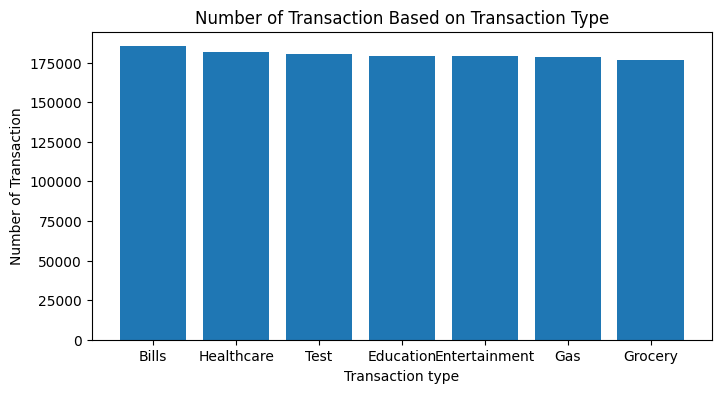

In [214]:


def highest_TRANSACTION_TYPE():
    
    conn = mydbconnection.connect(
                    host = 'localhost',
                    database='creditcard_capstone',
                    user = mysqlSecrets.mysql_username,
                    password = mysqlSecrets.mysql_password
        )
                     
    mycursor = conn.cursor()   
    
    sql = f"select TRANSACTION_TYPE, count(*) as NUM_TRANSACTION\
    from cdw_sapp_credit_card \
    group by TRANSACTION_TYPE ORDER BY NUM_TRANSACTION DESC"

    
    try:
        mycursor.execute(sql)
         

    except:
        conn.rollback()
    

    highest = mycursor.fetchall()
     # create DataFrame using data
    df = pd.DataFrame(highest, columns =['TRANSACTION_TYPE', 'NUM_TRANSACTION'])
    
    fig = plt.figure(figsize =(8, 4))
    print( "The Highest Transaction count Type is the ", df["TRANSACTION_TYPE"][0], "with total count of ", df["NUM_TRANSACTION"][0], "\n")
    
    plt.bar(df["TRANSACTION_TYPE"], df["NUM_TRANSACTION"])
    plt.xlabel("Transaction type")
    plt.ylabel("Number of Transaction")
    plt.title("Number of Transaction Based on Transaction Type")
    print(df)
    mycursor.close()
    conn.close()
highest_TRANSACTION_TYPE()


Functional Requirements 3.2	

Find and plot which state has a high number of customers.

Note: Save a copy of the visualization to a folder in your github, making sure it is PROPERLY NAMED!

The Highest number of customer state is  NY with total customer of  2592


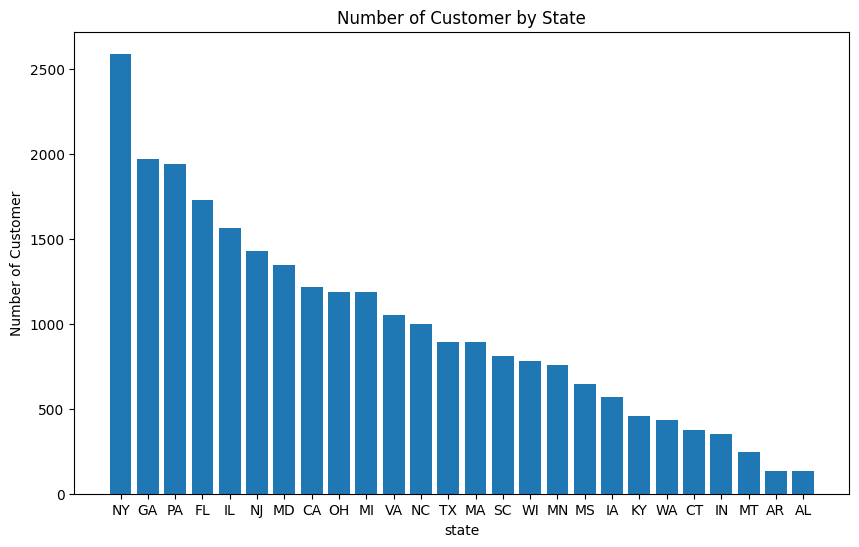

In [215]:
def customer_by_state():
    
    conn = mydbconnection.connect(
                    host = 'localhost',
                    database='creditcard_capstone',
                    user = mysqlSecrets.mysql_username,
                    password = mysqlSecrets.mysql_password
        )
                     
    mycursor = conn.cursor()   
    
    sql = f"select CUST_STATE, COUNT(SSN) AS NUM_CUSTOMER \
    FROM cdw_sapp_customer \
    group by CUST_STATE\
    ORDER BY NUM_CUSTOMER DESC"

    try:
        mycursor.execute(sql)
    except:
        conn.rollback()
    highest = mycursor.fetchall()
    
      # create DataFrame using data
    df = pd.DataFrame(highest, columns =['CUST_STATE', 'NUM_CUSTOMER'])
    
    fig = plt.figure(figsize =(10, 6))
    print( "The Highest number of customer state is ", df["CUST_STATE"][0], "with total customer of ", df["NUM_CUSTOMER"][0])
    
    plt.bar(df["CUST_STATE"], df["NUM_CUSTOMER"])
    plt.xlabel("state")
    plt.ylabel("Number of Customer")
    plt.title("Number of Customer by State")
    mycursor.close()
    conn.close()
customer_by_state()


Functional Requirements 3.3

Find and plot the sum of all transactions for the top 10 customers, and which customer has the highest transaction amount.
Hint (use CUST_SSN). 

Note: Save a copy of the visualization to a folder in your github, making sure it is PROPERLY NAMED!

sum of all transactions for the top 10 customers
    CUST_SSN  TOTAL_TRANSACTION
0  123451125          152092.89
1  123452783          149799.78
2  123453486          147854.16
3  123458668          143504.19
4  123456678          142047.81
5  123452026          141511.86
6  123452518          141046.92
7  123454933          140483.16
8  123457547          139043.25
9  123452085          138598.83


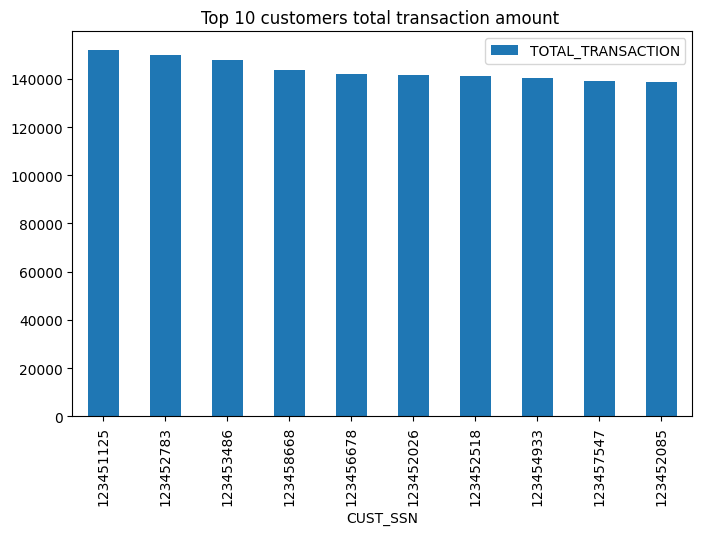

In [216]:
def top_ten_customers():
    
    conn = mydbconnection.connect(
                    host = 'localhost',
                    database='creditcard_capstone',
                    user = mysqlSecrets.mysql_username,
                    password = mysqlSecrets.mysql_password
        )
                     
    mycursor = conn.cursor()   
    
    sql = f"select CUST_SSN, SUM(TRANSACTION_VALUE) AS TOTAL_TRANSACTION \
    from cdw_sapp_credit_card \
    group by CUST_SSN \
    order by TOTAL_TRANSACTION DESC"
    try:
        mycursor.execute(sql)
    except:
        conn.rollback()

    highest = mycursor.fetchall()
      # create DataFrame using data
    df = pd.DataFrame(highest, columns =['CUST_SSN', 'TOTAL_TRANSACTION']).head(10)
    print("sum of all transactions for the top 10 customers")
    print(df)
        #fig = plt.figure(figsize =(10, 6))

    df.plot.bar(x = 'CUST_SSN', y = 'TOTAL_TRANSACTION', title ="Top 10 customers total transaction amount ", figsize =(8, 5))
    
    mycursor.close()
    conn.close()
top_ten_customers()

4. Functional Requirements - LOAN Application Dataset
Req-4	 Access to Loan API Endpoint

4.1 Create a Python program to GET (consume) data from the above API endpoint for the loan application dataset.

In [217]:

url = "https://raw.githubusercontent.com/platformps/LoanDataset/main/loan_data.json"

response = requests.get(url)
#convert json object to python dictionary object
loan_app_data = response.json()
print(loan_app_data)
print(type(loan_app_data))

[{'Application_ID': 'LP001002', 'Gender': 'Male', 'Married': 'No', 'Dependents': '0', 'Education': 'Graduate', 'Self_Employed': 'No', 'Credit_History': 1, 'Property_Area': 'Urban', 'Income': 'medium', 'Application_Status': 'Y'}, {'Application_ID': 'LP001003', 'Gender': 'Male', 'Married': 'Yes', 'Dependents': '1', 'Education': 'Graduate', 'Self_Employed': 'No', 'Credit_History': 1, 'Property_Area': 'Rural', 'Income': 'medium', 'Application_Status': 'N'}, {'Application_ID': 'LP001005', 'Gender': 'Male', 'Married': 'Yes', 'Dependents': '0', 'Education': 'Graduate', 'Self_Employed': 'Yes', 'Credit_History': 1, 'Property_Area': 'Urban', 'Income': 'low', 'Application_Status': 'Y'}, {'Application_ID': 'LP001006', 'Gender': 'Male', 'Married': 'Yes', 'Dependents': '0', 'Education': 'Not Graduate', 'Self_Employed': 'No', 'Credit_History': 1, 'Property_Area': 'Urban', 'Income': 'low', 'Application_Status': 'Y'}, {'Application_ID': 'LP001008', 'Gender': 'Male', 'Married': 'No', 'Dependents': '0', 

4.2  Find the status code of the above API endpoint.

Hint: status code could be 200, 400, 404, 401.

In [218]:
print("The status code of the of this API is:", response.status_code)

The status code of the of this API is: 200


4.3 Once Python reads data from the API, utilize PySpark to load data into RDBMS (SQL). The table name should be CDW-SAPP_loan_application in the database.

Note: Use the “creditcard_capstone” database.

In [219]:
spark = SparkSession.builder.appName('load_app').getOrCreate()
# Convert the list to a list of Row objects
rows = [Row(**row) for row in loan_app_data]

rows[0:5]

[Row(Application_ID='LP001002', Gender='Male', Married='No', Dependents='0', Education='Graduate', Self_Employed='No', Credit_History=1, Property_Area='Urban', Income='medium', Application_Status='Y'),
 Row(Application_ID='LP001003', Gender='Male', Married='Yes', Dependents='1', Education='Graduate', Self_Employed='No', Credit_History=1, Property_Area='Rural', Income='medium', Application_Status='N'),
 Row(Application_ID='LP001005', Gender='Male', Married='Yes', Dependents='0', Education='Graduate', Self_Employed='Yes', Credit_History=1, Property_Area='Urban', Income='low', Application_Status='Y'),
 Row(Application_ID='LP001006', Gender='Male', Married='Yes', Dependents='0', Education='Not Graduate', Self_Employed='No', Credit_History=1, Property_Area='Urban', Income='low', Application_Status='Y'),
 Row(Application_ID='LP001008', Gender='Male', Married='No', Dependents='0', Education='Graduate', Self_Employed='No', Credit_History=1, Property_Area='Urban', Income='medium', Application_S

In [220]:
# Define the schema for the loan dataset

schema = StructType([
    StructField("Application_ID", StringType(), True),
    StructField("Gender", StringType(), True),
    StructField("Married", StringType(), True),
    StructField("Dependents", StringType(), True),
    StructField("Education", StringType(), True),
    StructField("Self_Employed", StringType(), True),
    StructField("Credit_History", IntegerType(), True),
    StructField("Property_Area", StringType(), True),
    StructField("Income", StringType(), True),
    StructField("Application_Status", StringType(), True),

])

# Create a DataFrame
df_loan = spark.createDataFrame(rows, schema)
df_loan.show(5)

+--------------+------+-------+----------+------------+-------------+--------------+-------------+------+------------------+
|Application_ID|Gender|Married|Dependents|   Education|Self_Employed|Credit_History|Property_Area|Income|Application_Status|
+--------------+------+-------+----------+------------+-------------+--------------+-------------+------+------------------+
|      LP001002|  Male|     No|         0|    Graduate|           No|             1|        Urban|medium|                 Y|
|      LP001003|  Male|    Yes|         1|    Graduate|           No|             1|        Rural|medium|                 N|
|      LP001005|  Male|    Yes|         0|    Graduate|          Yes|             1|        Urban|   low|                 Y|
|      LP001006|  Male|    Yes|         0|Not Graduate|           No|             1|        Urban|   low|                 Y|
|      LP001008|  Male|     No|         0|    Graduate|           No|             1|        Urban|medium|                 Y|


In [221]:
df_loan.write.format("jdbc")\
    .mode("overwrite") \
    .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
    .option("dbtable", "`CDW-SAPP_loan_application`") \
    .option("user", mysqlSecrets.mysql_username) \
    .option("password", mysqlSecrets.mysql_password) \
    .save()
df_loan.show(5)

+--------------+------+-------+----------+------------+-------------+--------------+-------------+------+------------------+
|Application_ID|Gender|Married|Dependents|   Education|Self_Employed|Credit_History|Property_Area|Income|Application_Status|
+--------------+------+-------+----------+------------+-------------+--------------+-------------+------+------------------+
|      LP001002|  Male|     No|         0|    Graduate|           No|             1|        Urban|medium|                 Y|
|      LP001003|  Male|    Yes|         1|    Graduate|           No|             1|        Rural|medium|                 N|
|      LP001005|  Male|    Yes|         0|    Graduate|          Yes|             1|        Urban|   low|                 Y|
|      LP001006|  Male|    Yes|         0|Not Graduate|           No|             1|        Urban|   low|                 Y|
|      LP001008|  Male|     No|         0|    Graduate|           No|             1|        Urban|medium|                 Y|


5. Functional Requirements - Data Analysis and Visualization for LOAN Application

After the data is loaded into the database, the business analyst team wants to analyze and visualize the data.
Use Python libraries for the below requirements:

Req-5	Data Analysis and Visualization

Functional Requirements 5.1	

Find and plot the percentage of applications approved for self-employed applicants.
Note: Save a copy of the visualization to a folder in your github, making sure it is PROPERLY NAMED!

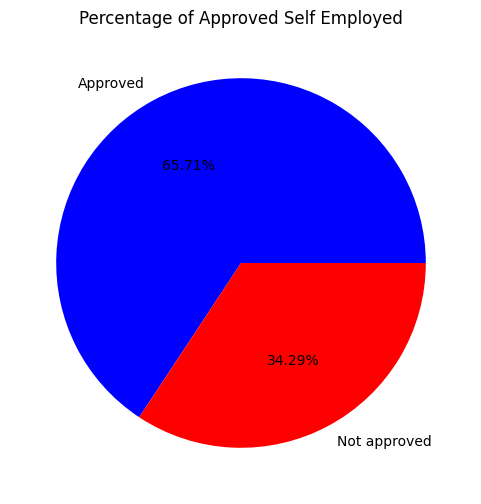

In [222]:
def  approved_self_emp ():

    df_loan.createOrReplaceTempView("loan_application")

    self_emp_all = spark.sql(f"select * from loan_application where Self_Employed = 'Yes'").count()


    self_emp_approved = spark.sql(f"select * from loan_application where Self_Employed = 'Yes' AND Application_Status ='Y'").count()
    lables = ["Approved", "Not approved"]
    if self_emp_all == 0:
        approved_app_percentage = 0
    else:
        approved_app_percentage = (self_emp_approved / self_emp_all) * 100

    fig = plt.figure(figsize =(6, 6))

    plt.pie([approved_app_percentage, 100 - approved_app_percentage], colors=['blue', 'red'], labels=lables, autopct='%1.2f%%' )
    plt.title("Percentage of Approved Self Employed")
    plt.show()
approved_self_emp()

Functional Requirements 5.2	

Find the percentage of rejection for married male applicants.
Note: Save a copy of the visualization to a folder in your github, making sure it is PROPERLY NAMED!

The percentage of rejected married male applicants is 28.43%


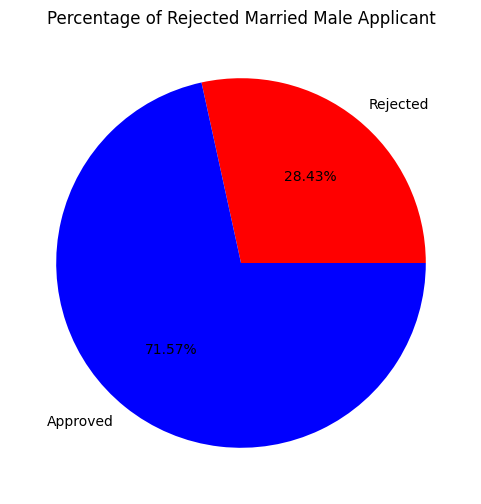

In [223]:
def rejected_married_M():
    married_male = spark.sql("select * from loan_application where Gender = 'Male' AND Married = 'Yes'").count()
    married_male_reje = spark.sql("select * from loan_application where Gender = 'Male' AND Married = 'Yes' AND Application_Status = 'N'").count()
    lables = ["Rejected", "Approved"]

    if married_male == 0:
        rejected_app_percentage = 0
    else:
        rejected_app_percentage = (married_male_reje / married_male) * 100
    print("The percentage of rejected married male applicants is " + str(round(rejected_app_percentage, 2)) + '%')
    fig = plt.figure(figsize =(6, 6))

    plt.pie([rejected_app_percentage, 100 - rejected_app_percentage], colors=['red', 'blue'], labels=lables, autopct='%1.2f%%' )
    plt.title("Percentage of Rejected Married Male Applicant")
    plt.show()
rejected_married_M() 

Functional Requirements 5.3	

Find and plot the top three months with the largest volume of transaction data.
Note: Save a copy of the visualization to a folder in your github, making sure it is PROPERLY NAMED!

    month  total_TRANSACTION_VALUE
0  201811               7546879.62
1  201812               7348711.77
2  201810               5469765.03


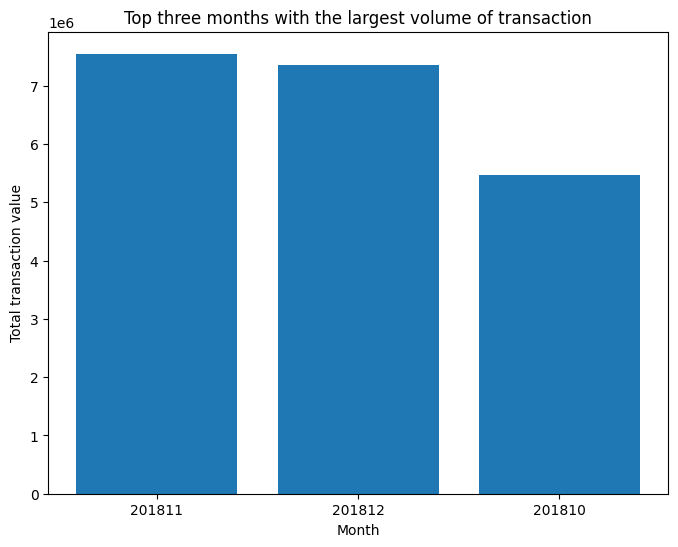

In [224]:

def top_largest_transaction():
    
    conn = mydbconnection.connect(
                    host = 'localhost',
                    database='creditcard_capstone',
                    user = mysqlSecrets.mysql_username,
                    password = mysqlSecrets.mysql_password
        )
                     
    mycursor = conn.cursor()   
    
    sql = f"select substring(TIMEID, 1, 6) as month, sum(TRANSACTION_VALUE) as total_TRANSACTION_VALUE from cdw_sapp_credit_card group by month order by total_TRANSACTION_VALUE DESC LIMIT 3 "
    try:
        mycursor.execute(sql)
         

    except:
        conn.rollback()

    top_3 = mycursor.fetchall()
    # create DataFrame using data
    df = pd.DataFrame(top_3, columns =['month', 'total_TRANSACTION_VALUE'])
    fig = plt.figure(figsize =(8, 6))

    plt.bar(df["month"], df["total_TRANSACTION_VALUE"])
    plt.xlabel("Month")
    plt.ylabel("Total transaction value")
    plt.title("Top three months with the largest volume of transaction")
    print(df)
    mycursor.close()
    conn.close()
top_largest_transaction()

Functional Requirements 5.4	
Find and plot which branch processed the highest total dollar value of healthcare transactions.
Note: Save a copy of the visualization to a folder in your github, making sure it is PROPERLY NAMED!. 

   BRANCH_CODE  TOTAL_HEALTHCARE_TRANSACTION
0           25                     117994.86
[(25, 117994.85999999972)]


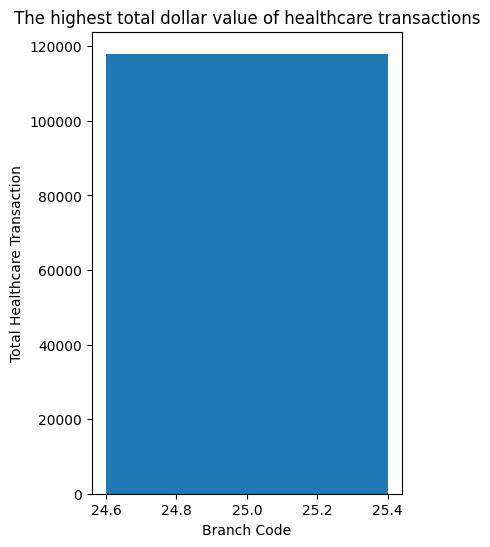

----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 50713)
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\socketserver.py", line 747, in __init__
    self.handle()
  File "C:\Users\Learner_9ZH3Z189\AppData\Local\P

In [225]:
def highest_transaction():
    
    conn = mydbconnection.connect(
                    host = 'localhost',
                    database='creditcard_capstone',
                    user = mysqlSecrets.mysql_username,
                    password = mysqlSecrets.mysql_password
        )
                     
    mycursor = conn.cursor()   
    
    sql = f"SELECT BRANCH_CODE, SUM(TRANSACTION_VALUE) AS TOTAL_HEALTHCARE_TRANSACTION \
    FROM cdw_sapp_credit_card \
    WHERE TRANSACTION_TYPE = 'Healthcare'group by BRANCH_CODE \
    order by TOTAL_HEALTHCARE_TRANSACTION desc limit 1"
    try:
        mycursor.execute(sql)
    except:
        conn.rollback()

    highest = mycursor.fetchall()
     # create DataFrame using data
    df = pd.DataFrame(highest, columns =['BRANCH_CODE', 'TOTAL_HEALTHCARE_TRANSACTION'])
    fig = plt.figure(figsize =(4, 6))

    plt.bar(df["BRANCH_CODE"], df["TOTAL_HEALTHCARE_TRANSACTION"])
    plt.xlabel("Branch Code")
    plt.ylabel("Total Healthcare Transaction")
    plt.title("The highest total dollar value of healthcare transactions")
    print(df)
    print(highest)
    mycursor.close()
    conn.close()
highest_transaction()